Name:  

    Read_save_SASZe_lut

Purpose:  

    Read the output files from the SASZe lut after libradran run.  
    Based on inputs created by Prepare_SASZe_lut  
    For the SAS Ze ARM measurements

Calling Sequence:

    python Read_save_SASZe_lut
  
Input:

    none

Output:
   
    Save matlab file of lut files
  
Keywords:

    none
  
Dependencies:

    - numpy
    - hdf5storage : for saving and reading
    - Run_Libradtran
    - os
  
Needed Files:

  - ...
    
History:

    Written: Samuel LeBlanc, Santa Cruz, 2022-10-18
             - Based on Read_save_KORUS_lut

# Prepare the python environment

In [3]:
import numpy as np
import Run_libradtran as RL
import hdf5storage as hs
import os
import scipy.io as sio
from path_utils import getpath

In [7]:
name = 'SASZe'
vv = 'v1'

In [8]:
fp = getpath(name)
fp_rtm = getpath('rtm')
fp_uvspec = getpath('uvspec')+'uvspec'
fp_rtmdat = getpath('rtm')+'dat/'

('Return path named: ', 'SASZe', u'/data/sam/SASZe/')
('Return path named: ', 'rtm', u'/scratch/rtm/')
('Return path named: ', 'uvspec', u'/home/sam/libradtran/libRadtran-2.0.2/bin/')
('Return path named: ', 'rtm', u'/scratch/rtm/')


# Setup the variables used for lut

In [9]:
# try to read from the saved version file
from load_utils import load_from_json, deep_convert_dict
try:
    d = load_from_json(fp+'{name}_lut_{vv}.txt'.format(vv=vv,name=name))
    if 'lut' in d.keys():
        sza = d['lut']['sza']
        tau = d['lut']['tau']
        ref = d['lut']['ref']
        fmt = d['lut']['format']
    elif 'lut_details' in d.keys():
        sza = d['lut_details']['sza']
        tau = d['lut_details']['tau']
        ref = d['lut_details']['ref']
        fmt = d['lut_details']['format']
    else:
        raise ValueError
    zout = d['geo']['zout']
    mu = np.round(1.0/np.cos(sza*np.pi/180.0))
    use_json = True
except ValueError: # not a json file try old way
    print '*** LUT definition file problem! Using predefined lut description'
    use_json = False
    fmt='lut_sza{sza:02.0f}_tau{tau:06.2f}_ref{ref:04.1f}_{phase}_w{iwvl:1d}.dat'
    if vv=='v1':
        mu = np.arange(1.05,4.0,0.2)
        sza = np.round(np.arccos(1.0/mu)*180.0/np.pi)
        tau = np.array([0.1,0.2,0.3,0.5,0.75,1.0,1.5,2.0,2.5,3.0,4.0,5.0,
               6.0,7.0,8.0,9.0,10.0,12.5,15.0,17.5,20.0,25.0,30.0,35.0,40.0,50.0,
               60.0,80.0,100.0])
        ref = np.append(np.append(np.arange(2,15),np.arange(15,30,2)),np.ceil(np.arange(30,61,2.5)))
        zout = [0.2,1.5,100.0]
    elif vv=='v3':
        mu = np.arange(1.05,4.0,0.2)
        sza = np.round(np.arccos(1.0/mu)*180.0/np.pi)
        tau = np.array([0.1,0.2,0.5,0.75,1.0,1.5,2.0,3.0,4.0,5.0,
               6.0,7.0,8.0,9.0,10.0,12.5,15.0,17.5,20.0,25.0,30.0,35.0,40.0,50.0,
               60.0,80.0,100.0])
        ref = np.append(np.append(np.arange(1,15),np.arange(15,30,2)),np.ceil(np.arange(30,61,2.5)))
        zout = [0.2,1.5,100.0]    

/home/sam/.local/lib/python2.7/site-packages/json_tricks/np.py:22: JsonTricksDeprecation: `json_tricks.np` is deprecated, you can import directly from `json_tricks`
  warnings.warn('`json_tricks.np` is deprecated, you can import directly from `json_tricks`', JsonTricksDeprecation)
/home/sam/.local/lib/python2.7/site-packages/json_tricks/nonp.py:225: JsonTricksDeprecation: `json_tricks.load(s)` stripped some comments, but `ignore_comments` was not passed; in the next major release, the behaviour when `ignore_comments` is not passed will change; it is recommended to explicitly pass `ignore_comments=True` if you want to strip comments; see https://github.com/mverleg/pyjson_tricks/issues/74
  JsonTricksDeprecation)


In [10]:
fp_out = os.path.join(fp_rtm,'output','{vv}_{name}'.format(vv=vv,name=name))

In [11]:
dat = RL.read_lut(fp_out,zout=zout,tau=tau,ref=ref,sza=sza,
                  phase=['wc','ic'],
                  fmt=fmt,
                  split_wvl=True)

(18.0, 0.1, 1.0)
(18.0, 0.1, 2.0)
(18.0, 0.1, 3.0)
(18.0, 0.1, 4.0)
(18.0, 0.1, 5.0)
(18.0, 0.1, 6.0)
(18.0, 0.1, 7.0)
(18.0, 0.1, 8.0)
(18.0, 0.1, 9.0)
(18.0, 0.1, 10.0)
(18.0, 0.1, 11.0)
(18.0, 0.1, 12.0)
(18.0, 0.1, 13.0)
(18.0, 0.1, 14.0)
(18.0, 0.1, 15.0)
(18.0, 0.1, 17.0)
(18.0, 0.1, 19.0)
(18.0, 0.1, 21.0)
(18.0, 0.1, 23.0)
(18.0, 0.1, 25.0)
(18.0, 0.1, 25.0)
(18.0, 0.1, 27.0)
(18.0, 0.1, 27.0)
(18.0, 0.1, 29.0)
(18.0, 0.1, 29.0)
(18.0, 0.1, 30.0)
(18.0, 0.1, 30.0)
(18.0, 0.1, 33.0)
(18.0, 0.1, 35.0)
(18.0, 0.1, 38.0)
(18.0, 0.1, 40.0)
(18.0, 0.1, 43.0)
(18.0, 0.1, 45.0)
(18.0, 0.1, 48.0)
(18.0, 0.1, 50.0)
(18.0, 0.1, 53.0)
(18.0, 0.1, 55.0)
(18.0, 0.1, 58.0)
(18.0, 0.1, 60.0)
(18.0, 0.2, 1.0)
(18.0, 0.2, 2.0)
(18.0, 0.2, 3.0)
(18.0, 0.2, 4.0)
(18.0, 0.2, 5.0)
(18.0, 0.2, 6.0)
(18.0, 0.2, 7.0)
(18.0, 0.2, 8.0)
(18.0, 0.2, 9.0)
(18.0, 0.2, 10.0)
(18.0, 0.2, 11.0)
(18.0, 0.2, 12.0)
(18.0, 0.2, 13.0)
(18.0, 0.2, 14.0)
(18.0, 0.2, 15.0)
(18.0, 0.2, 17.0)
(18.0, 0.2, 19.0)
(18.0, 0.2

(18.0, 7.0, 45.0)
(18.0, 7.0, 48.0)
(18.0, 7.0, 50.0)
(18.0, 7.0, 53.0)
(18.0, 7.0, 55.0)
(18.0, 7.0, 58.0)
(18.0, 7.0, 60.0)
(18.0, 8.0, 1.0)
(18.0, 8.0, 2.0)
(18.0, 8.0, 3.0)
(18.0, 8.0, 4.0)
(18.0, 8.0, 5.0)
(18.0, 8.0, 6.0)
(18.0, 8.0, 7.0)
(18.0, 8.0, 8.0)
(18.0, 8.0, 9.0)
(18.0, 8.0, 10.0)
(18.0, 8.0, 11.0)
(18.0, 8.0, 12.0)
(18.0, 8.0, 13.0)
(18.0, 8.0, 14.0)
(18.0, 8.0, 15.0)
(18.0, 8.0, 17.0)
(18.0, 8.0, 19.0)
(18.0, 8.0, 21.0)
(18.0, 8.0, 23.0)
(18.0, 8.0, 25.0)
(18.0, 8.0, 25.0)
(18.0, 8.0, 27.0)
(18.0, 8.0, 27.0)
(18.0, 8.0, 29.0)
(18.0, 8.0, 29.0)
(18.0, 8.0, 30.0)
(18.0, 8.0, 30.0)
(18.0, 8.0, 33.0)
(18.0, 8.0, 35.0)
(18.0, 8.0, 38.0)
(18.0, 8.0, 40.0)
(18.0, 8.0, 43.0)
(18.0, 8.0, 45.0)
(18.0, 8.0, 48.0)
(18.0, 8.0, 50.0)
(18.0, 8.0, 53.0)
(18.0, 8.0, 55.0)
(18.0, 8.0, 58.0)
(18.0, 8.0, 60.0)
(18.0, 9.0, 1.0)
(18.0, 9.0, 2.0)
(18.0, 9.0, 3.0)
(18.0, 9.0, 4.0)
(18.0, 9.0, 5.0)
(18.0, 9.0, 6.0)
(18.0, 9.0, 7.0)
(18.0, 9.0, 8.0)
(18.0, 9.0, 9.0)
(18.0, 9.0, 10.0)
(18.0, 9.0

(18.0, 50.0, 9.0)
(18.0, 50.0, 10.0)
(18.0, 50.0, 11.0)
(18.0, 50.0, 12.0)
(18.0, 50.0, 13.0)
(18.0, 50.0, 14.0)
(18.0, 50.0, 15.0)
(18.0, 50.0, 17.0)
(18.0, 50.0, 19.0)
(18.0, 50.0, 21.0)
(18.0, 50.0, 23.0)
(18.0, 50.0, 25.0)
(18.0, 50.0, 25.0)
(18.0, 50.0, 27.0)
(18.0, 50.0, 27.0)
(18.0, 50.0, 29.0)
(18.0, 50.0, 29.0)
(18.0, 50.0, 30.0)
(18.0, 50.0, 30.0)
(18.0, 50.0, 33.0)
(18.0, 50.0, 35.0)
(18.0, 50.0, 38.0)
(18.0, 50.0, 40.0)
(18.0, 50.0, 43.0)
(18.0, 50.0, 45.0)
(18.0, 50.0, 48.0)
(18.0, 50.0, 50.0)
(18.0, 50.0, 53.0)
(18.0, 50.0, 55.0)
(18.0, 50.0, 58.0)
(18.0, 50.0, 60.0)
(18.0, 60.0, 1.0)
(18.0, 60.0, 2.0)
(18.0, 60.0, 3.0)
(18.0, 60.0, 4.0)
(18.0, 60.0, 5.0)
(18.0, 60.0, 6.0)
(18.0, 60.0, 7.0)
(18.0, 60.0, 8.0)
(18.0, 60.0, 9.0)
(18.0, 60.0, 10.0)
(18.0, 60.0, 11.0)
(18.0, 60.0, 12.0)
(18.0, 60.0, 13.0)
(18.0, 60.0, 14.0)
(18.0, 60.0, 15.0)
(18.0, 60.0, 17.0)
(18.0, 60.0, 19.0)
(18.0, 60.0, 21.0)
(18.0, 60.0, 23.0)
(18.0, 60.0, 25.0)
(18.0, 60.0, 25.0)
(18.0, 60.0, 27.0)
(18

(37.0, 3.0, 38.0)
(37.0, 3.0, 40.0)
(37.0, 3.0, 43.0)
(37.0, 3.0, 45.0)
(37.0, 3.0, 48.0)
(37.0, 3.0, 50.0)
(37.0, 3.0, 53.0)
(37.0, 3.0, 55.0)
(37.0, 3.0, 58.0)
(37.0, 3.0, 60.0)
(37.0, 4.0, 1.0)
(37.0, 4.0, 2.0)
(37.0, 4.0, 3.0)
(37.0, 4.0, 4.0)
(37.0, 4.0, 5.0)
(37.0, 4.0, 6.0)
(37.0, 4.0, 7.0)
(37.0, 4.0, 8.0)
(37.0, 4.0, 9.0)
(37.0, 4.0, 10.0)
(37.0, 4.0, 11.0)
(37.0, 4.0, 12.0)
(37.0, 4.0, 13.0)
(37.0, 4.0, 14.0)
(37.0, 4.0, 15.0)
(37.0, 4.0, 17.0)
(37.0, 4.0, 19.0)
(37.0, 4.0, 21.0)
(37.0, 4.0, 23.0)
(37.0, 4.0, 25.0)
(37.0, 4.0, 25.0)
(37.0, 4.0, 27.0)
(37.0, 4.0, 27.0)
(37.0, 4.0, 29.0)
(37.0, 4.0, 29.0)
(37.0, 4.0, 30.0)
(37.0, 4.0, 30.0)
(37.0, 4.0, 33.0)
(37.0, 4.0, 35.0)
(37.0, 4.0, 38.0)
(37.0, 4.0, 40.0)
(37.0, 4.0, 43.0)
(37.0, 4.0, 45.0)
(37.0, 4.0, 48.0)
(37.0, 4.0, 50.0)
(37.0, 4.0, 53.0)
(37.0, 4.0, 55.0)
(37.0, 4.0, 58.0)
(37.0, 4.0, 60.0)
(37.0, 5.0, 1.0)
(37.0, 5.0, 2.0)
(37.0, 5.0, 3.0)
(37.0, 5.0, 4.0)
(37.0, 5.0, 5.0)
(37.0, 5.0, 6.0)
(37.0, 5.0, 7.0)
(37.0, 5

(37.0, 25.0, 12.0)
(37.0, 25.0, 13.0)
(37.0, 25.0, 14.0)
(37.0, 25.0, 15.0)
(37.0, 25.0, 17.0)
(37.0, 25.0, 19.0)
(37.0, 25.0, 21.0)
(37.0, 25.0, 23.0)
(37.0, 25.0, 25.0)
(37.0, 25.0, 25.0)
(37.0, 25.0, 27.0)
(37.0, 25.0, 27.0)
(37.0, 25.0, 29.0)
(37.0, 25.0, 29.0)
(37.0, 25.0, 30.0)
(37.0, 25.0, 30.0)
(37.0, 25.0, 33.0)
(37.0, 25.0, 35.0)
(37.0, 25.0, 38.0)
(37.0, 25.0, 40.0)
(37.0, 25.0, 43.0)
(37.0, 25.0, 45.0)
(37.0, 25.0, 48.0)
(37.0, 25.0, 50.0)
(37.0, 25.0, 53.0)
(37.0, 25.0, 55.0)
(37.0, 25.0, 58.0)
(37.0, 25.0, 60.0)
(37.0, 30.0, 1.0)
(37.0, 30.0, 2.0)
(37.0, 30.0, 3.0)
(37.0, 30.0, 4.0)
(37.0, 30.0, 5.0)
(37.0, 30.0, 6.0)
(37.0, 30.0, 7.0)
(37.0, 30.0, 8.0)
(37.0, 30.0, 9.0)
(37.0, 30.0, 10.0)
(37.0, 30.0, 11.0)
(37.0, 30.0, 12.0)
(37.0, 30.0, 13.0)
(37.0, 30.0, 14.0)
(37.0, 30.0, 15.0)
(37.0, 30.0, 17.0)
(37.0, 30.0, 19.0)
(37.0, 30.0, 21.0)
(37.0, 30.0, 23.0)
(37.0, 30.0, 25.0)
(37.0, 30.0, 25.0)
(37.0, 30.0, 27.0)
(37.0, 30.0, 27.0)
(37.0, 30.0, 29.0)
(37.0, 30.0, 29.0)
(3

(46.0, 0.75, 30.0)
(46.0, 0.75, 33.0)
(46.0, 0.75, 35.0)
(46.0, 0.75, 38.0)
(46.0, 0.75, 40.0)
(46.0, 0.75, 43.0)
(46.0, 0.75, 45.0)
(46.0, 0.75, 48.0)
(46.0, 0.75, 50.0)
(46.0, 0.75, 53.0)
(46.0, 0.75, 55.0)
(46.0, 0.75, 58.0)
(46.0, 0.75, 60.0)
(46.0, 1.0, 1.0)
(46.0, 1.0, 2.0)
(46.0, 1.0, 3.0)
(46.0, 1.0, 4.0)
(46.0, 1.0, 5.0)
(46.0, 1.0, 6.0)
(46.0, 1.0, 7.0)
(46.0, 1.0, 8.0)
(46.0, 1.0, 9.0)
(46.0, 1.0, 10.0)
(46.0, 1.0, 11.0)
(46.0, 1.0, 12.0)
(46.0, 1.0, 13.0)
(46.0, 1.0, 14.0)
(46.0, 1.0, 15.0)
(46.0, 1.0, 17.0)
(46.0, 1.0, 19.0)
(46.0, 1.0, 21.0)
(46.0, 1.0, 23.0)
(46.0, 1.0, 25.0)
(46.0, 1.0, 25.0)
(46.0, 1.0, 27.0)
(46.0, 1.0, 27.0)
(46.0, 1.0, 29.0)
(46.0, 1.0, 29.0)
(46.0, 1.0, 30.0)
(46.0, 1.0, 30.0)
(46.0, 1.0, 33.0)
(46.0, 1.0, 35.0)
(46.0, 1.0, 38.0)
(46.0, 1.0, 40.0)
(46.0, 1.0, 43.0)
(46.0, 1.0, 45.0)
(46.0, 1.0, 48.0)
(46.0, 1.0, 50.0)
(46.0, 1.0, 53.0)
(46.0, 1.0, 55.0)
(46.0, 1.0, 58.0)
(46.0, 1.0, 60.0)
(46.0, 1.5, 1.0)
(46.0, 1.5, 2.0)
(46.0, 1.5, 3.0)
(46.0, 1.

(46.0, 12.5, 25.0)
(46.0, 12.5, 27.0)
(46.0, 12.5, 27.0)
(46.0, 12.5, 29.0)
(46.0, 12.5, 29.0)
(46.0, 12.5, 30.0)
(46.0, 12.5, 30.0)
(46.0, 12.5, 33.0)
(46.0, 12.5, 35.0)
(46.0, 12.5, 38.0)
(46.0, 12.5, 40.0)
(46.0, 12.5, 43.0)
(46.0, 12.5, 45.0)
(46.0, 12.5, 48.0)
(46.0, 12.5, 50.0)
(46.0, 12.5, 53.0)
(46.0, 12.5, 55.0)
(46.0, 12.5, 58.0)
(46.0, 12.5, 60.0)
(46.0, 15.0, 1.0)
(46.0, 15.0, 2.0)
(46.0, 15.0, 3.0)
(46.0, 15.0, 4.0)
(46.0, 15.0, 5.0)
(46.0, 15.0, 6.0)
(46.0, 15.0, 7.0)
(46.0, 15.0, 8.0)
(46.0, 15.0, 9.0)
(46.0, 15.0, 10.0)
(46.0, 15.0, 11.0)
(46.0, 15.0, 12.0)
(46.0, 15.0, 13.0)
(46.0, 15.0, 14.0)
(46.0, 15.0, 15.0)
(46.0, 15.0, 17.0)
(46.0, 15.0, 19.0)
(46.0, 15.0, 21.0)
(46.0, 15.0, 23.0)
(46.0, 15.0, 25.0)
(46.0, 15.0, 25.0)
(46.0, 15.0, 27.0)
(46.0, 15.0, 27.0)
(46.0, 15.0, 29.0)
(46.0, 15.0, 29.0)
(46.0, 15.0, 30.0)
(46.0, 15.0, 30.0)
(46.0, 15.0, 33.0)
(46.0, 15.0, 35.0)
(46.0, 15.0, 38.0)
(46.0, 15.0, 40.0)
(46.0, 15.0, 43.0)
(46.0, 15.0, 45.0)
(46.0, 15.0, 48.0)
(4

(46.0, 100.0, 38.0)
(46.0, 100.0, 40.0)
(46.0, 100.0, 43.0)
(46.0, 100.0, 45.0)
(46.0, 100.0, 48.0)
(46.0, 100.0, 50.0)
(46.0, 100.0, 53.0)
(46.0, 100.0, 55.0)
(46.0, 100.0, 58.0)
(46.0, 100.0, 60.0)
(53.0, 0.1, 1.0)
(53.0, 0.1, 2.0)
(53.0, 0.1, 3.0)
(53.0, 0.1, 4.0)
(53.0, 0.1, 5.0)
(53.0, 0.1, 6.0)
(53.0, 0.1, 7.0)
(53.0, 0.1, 8.0)
(53.0, 0.1, 9.0)
(53.0, 0.1, 10.0)
(53.0, 0.1, 11.0)
(53.0, 0.1, 12.0)
(53.0, 0.1, 13.0)
(53.0, 0.1, 14.0)
(53.0, 0.1, 15.0)
(53.0, 0.1, 17.0)
(53.0, 0.1, 19.0)
(53.0, 0.1, 21.0)
(53.0, 0.1, 23.0)
(53.0, 0.1, 25.0)
(53.0, 0.1, 25.0)
(53.0, 0.1, 27.0)
(53.0, 0.1, 27.0)
(53.0, 0.1, 29.0)
(53.0, 0.1, 29.0)
(53.0, 0.1, 30.0)
(53.0, 0.1, 30.0)
(53.0, 0.1, 33.0)
(53.0, 0.1, 35.0)
(53.0, 0.1, 38.0)
(53.0, 0.1, 40.0)
(53.0, 0.1, 43.0)
(53.0, 0.1, 45.0)
(53.0, 0.1, 48.0)
(53.0, 0.1, 50.0)
(53.0, 0.1, 53.0)
(53.0, 0.1, 55.0)
(53.0, 0.1, 58.0)
(53.0, 0.1, 60.0)
(53.0, 0.2, 1.0)
(53.0, 0.2, 2.0)
(53.0, 0.2, 3.0)
(53.0, 0.2, 4.0)
(53.0, 0.2, 5.0)
(53.0, 0.2, 6.0)
(53.0

(53.0, 7.0, 29.0)
(53.0, 7.0, 29.0)
(53.0, 7.0, 30.0)
(53.0, 7.0, 30.0)
(53.0, 7.0, 33.0)
(53.0, 7.0, 35.0)
(53.0, 7.0, 38.0)
(53.0, 7.0, 40.0)
(53.0, 7.0, 43.0)
(53.0, 7.0, 45.0)
(53.0, 7.0, 48.0)
(53.0, 7.0, 50.0)
(53.0, 7.0, 53.0)
(53.0, 7.0, 55.0)
(53.0, 7.0, 58.0)
(53.0, 7.0, 60.0)
(53.0, 8.0, 1.0)
(53.0, 8.0, 2.0)
(53.0, 8.0, 3.0)
(53.0, 8.0, 4.0)
(53.0, 8.0, 5.0)
(53.0, 8.0, 6.0)
(53.0, 8.0, 7.0)
(53.0, 8.0, 8.0)
(53.0, 8.0, 9.0)
(53.0, 8.0, 10.0)
(53.0, 8.0, 11.0)
(53.0, 8.0, 12.0)
(53.0, 8.0, 13.0)
(53.0, 8.0, 14.0)
(53.0, 8.0, 15.0)
(53.0, 8.0, 17.0)
(53.0, 8.0, 19.0)
(53.0, 8.0, 21.0)
(53.0, 8.0, 23.0)
(53.0, 8.0, 25.0)
(53.0, 8.0, 25.0)
(53.0, 8.0, 27.0)
(53.0, 8.0, 27.0)
(53.0, 8.0, 29.0)
(53.0, 8.0, 29.0)
(53.0, 8.0, 30.0)
(53.0, 8.0, 30.0)
(53.0, 8.0, 33.0)
(53.0, 8.0, 35.0)
(53.0, 8.0, 38.0)
(53.0, 8.0, 40.0)
(53.0, 8.0, 43.0)
(53.0, 8.0, 45.0)
(53.0, 8.0, 48.0)
(53.0, 8.0, 50.0)
(53.0, 8.0, 53.0)
(53.0, 8.0, 55.0)
(53.0, 8.0, 58.0)
(53.0, 8.0, 60.0)
(53.0, 9.0, 1.0)
(5

(53.0, 40.0, 60.0)
(53.0, 50.0, 1.0)
(53.0, 50.0, 2.0)
(53.0, 50.0, 3.0)
(53.0, 50.0, 4.0)
(53.0, 50.0, 5.0)
(53.0, 50.0, 6.0)
(53.0, 50.0, 7.0)
(53.0, 50.0, 8.0)
(53.0, 50.0, 9.0)
(53.0, 50.0, 10.0)
(53.0, 50.0, 11.0)
(53.0, 50.0, 12.0)
(53.0, 50.0, 13.0)
(53.0, 50.0, 14.0)
(53.0, 50.0, 15.0)
(53.0, 50.0, 17.0)
(53.0, 50.0, 19.0)
(53.0, 50.0, 21.0)
(53.0, 50.0, 23.0)
(53.0, 50.0, 25.0)
(53.0, 50.0, 25.0)
(53.0, 50.0, 27.0)
(53.0, 50.0, 27.0)
(53.0, 50.0, 29.0)
(53.0, 50.0, 29.0)
(53.0, 50.0, 30.0)
(53.0, 50.0, 30.0)
(53.0, 50.0, 33.0)
(53.0, 50.0, 35.0)
(53.0, 50.0, 38.0)
(53.0, 50.0, 40.0)
(53.0, 50.0, 43.0)
(53.0, 50.0, 45.0)
(53.0, 50.0, 48.0)
(53.0, 50.0, 50.0)
(53.0, 50.0, 53.0)
(53.0, 50.0, 55.0)
(53.0, 50.0, 58.0)
(53.0, 50.0, 60.0)
(53.0, 60.0, 1.0)
(53.0, 60.0, 2.0)
(53.0, 60.0, 3.0)
(53.0, 60.0, 4.0)
(53.0, 60.0, 5.0)
(53.0, 60.0, 6.0)
(53.0, 60.0, 7.0)
(53.0, 60.0, 8.0)
(53.0, 60.0, 9.0)
(53.0, 60.0, 10.0)
(53.0, 60.0, 11.0)
(53.0, 60.0, 12.0)
(53.0, 60.0, 13.0)
(53.0, 60.0

(57.0, 3.0, 25.0)
(57.0, 3.0, 27.0)
(57.0, 3.0, 27.0)
(57.0, 3.0, 29.0)
(57.0, 3.0, 29.0)
(57.0, 3.0, 30.0)
(57.0, 3.0, 30.0)
(57.0, 3.0, 33.0)
(57.0, 3.0, 35.0)
(57.0, 3.0, 38.0)
(57.0, 3.0, 40.0)
(57.0, 3.0, 43.0)
(57.0, 3.0, 45.0)
(57.0, 3.0, 48.0)
(57.0, 3.0, 50.0)
(57.0, 3.0, 53.0)
(57.0, 3.0, 55.0)
(57.0, 3.0, 58.0)
(57.0, 3.0, 60.0)
(57.0, 4.0, 1.0)
(57.0, 4.0, 2.0)
(57.0, 4.0, 3.0)
(57.0, 4.0, 4.0)
(57.0, 4.0, 5.0)
(57.0, 4.0, 6.0)
(57.0, 4.0, 7.0)
(57.0, 4.0, 8.0)
(57.0, 4.0, 9.0)
(57.0, 4.0, 10.0)
(57.0, 4.0, 11.0)
(57.0, 4.0, 12.0)
(57.0, 4.0, 13.0)
(57.0, 4.0, 14.0)
(57.0, 4.0, 15.0)
(57.0, 4.0, 17.0)
(57.0, 4.0, 19.0)
(57.0, 4.0, 21.0)
(57.0, 4.0, 23.0)
(57.0, 4.0, 25.0)
(57.0, 4.0, 25.0)
(57.0, 4.0, 27.0)
(57.0, 4.0, 27.0)
(57.0, 4.0, 29.0)
(57.0, 4.0, 29.0)
(57.0, 4.0, 30.0)
(57.0, 4.0, 30.0)
(57.0, 4.0, 33.0)
(57.0, 4.0, 35.0)
(57.0, 4.0, 38.0)
(57.0, 4.0, 40.0)
(57.0, 4.0, 43.0)
(57.0, 4.0, 45.0)
(57.0, 4.0, 48.0)
(57.0, 4.0, 50.0)
(57.0, 4.0, 53.0)
(57.0, 4.0, 55.0)
(

(57.0, 25.0, 3.0)
(57.0, 25.0, 4.0)
(57.0, 25.0, 5.0)
(57.0, 25.0, 6.0)
(57.0, 25.0, 7.0)
(57.0, 25.0, 8.0)
(57.0, 25.0, 9.0)
(57.0, 25.0, 10.0)
(57.0, 25.0, 11.0)
(57.0, 25.0, 12.0)
(57.0, 25.0, 13.0)
(57.0, 25.0, 14.0)
(57.0, 25.0, 15.0)
(57.0, 25.0, 17.0)
(57.0, 25.0, 19.0)
(57.0, 25.0, 21.0)
(57.0, 25.0, 23.0)
(57.0, 25.0, 25.0)
(57.0, 25.0, 25.0)
(57.0, 25.0, 27.0)
(57.0, 25.0, 27.0)
(57.0, 25.0, 29.0)
(57.0, 25.0, 29.0)
(57.0, 25.0, 30.0)
(57.0, 25.0, 30.0)
(57.0, 25.0, 33.0)
(57.0, 25.0, 35.0)
(57.0, 25.0, 38.0)
(57.0, 25.0, 40.0)
(57.0, 25.0, 43.0)
(57.0, 25.0, 45.0)
(57.0, 25.0, 48.0)
(57.0, 25.0, 50.0)
(57.0, 25.0, 53.0)
(57.0, 25.0, 55.0)
(57.0, 25.0, 58.0)
(57.0, 25.0, 60.0)
(57.0, 30.0, 1.0)
(57.0, 30.0, 2.0)
(57.0, 30.0, 3.0)
(57.0, 30.0, 4.0)
(57.0, 30.0, 5.0)
(57.0, 30.0, 6.0)
(57.0, 30.0, 7.0)
(57.0, 30.0, 8.0)
(57.0, 30.0, 9.0)
(57.0, 30.0, 10.0)
(57.0, 30.0, 11.0)
(57.0, 30.0, 12.0)
(57.0, 30.0, 13.0)
(57.0, 30.0, 14.0)
(57.0, 30.0, 15.0)
(57.0, 30.0, 17.0)
(57.0, 30

(61.0, 0.75, 21.0)
(61.0, 0.75, 23.0)
(61.0, 0.75, 25.0)
(61.0, 0.75, 25.0)
(61.0, 0.75, 27.0)
(61.0, 0.75, 27.0)
(61.0, 0.75, 29.0)
(61.0, 0.75, 29.0)
(61.0, 0.75, 30.0)
(61.0, 0.75, 30.0)
(61.0, 0.75, 33.0)
(61.0, 0.75, 35.0)
(61.0, 0.75, 38.0)
(61.0, 0.75, 40.0)
(61.0, 0.75, 43.0)
(61.0, 0.75, 45.0)
(61.0, 0.75, 48.0)
(61.0, 0.75, 50.0)
(61.0, 0.75, 53.0)
(61.0, 0.75, 55.0)
(61.0, 0.75, 58.0)
(61.0, 0.75, 60.0)
(61.0, 1.0, 1.0)
(61.0, 1.0, 2.0)
(61.0, 1.0, 3.0)
(61.0, 1.0, 4.0)
(61.0, 1.0, 5.0)
(61.0, 1.0, 6.0)
(61.0, 1.0, 7.0)
(61.0, 1.0, 8.0)
(61.0, 1.0, 9.0)
(61.0, 1.0, 10.0)
(61.0, 1.0, 11.0)
(61.0, 1.0, 12.0)
(61.0, 1.0, 13.0)
(61.0, 1.0, 14.0)
(61.0, 1.0, 15.0)
(61.0, 1.0, 17.0)
(61.0, 1.0, 19.0)
(61.0, 1.0, 21.0)
(61.0, 1.0, 23.0)
(61.0, 1.0, 25.0)
(61.0, 1.0, 25.0)
(61.0, 1.0, 27.0)
(61.0, 1.0, 27.0)
(61.0, 1.0, 29.0)
(61.0, 1.0, 29.0)
(61.0, 1.0, 30.0)
(61.0, 1.0, 30.0)
(61.0, 1.0, 33.0)
(61.0, 1.0, 35.0)
(61.0, 1.0, 38.0)
(61.0, 1.0, 40.0)
(61.0, 1.0, 43.0)
(61.0, 1.0, 45.

(61.0, 12.5, 12.0)
(61.0, 12.5, 13.0)
(61.0, 12.5, 14.0)
(61.0, 12.5, 15.0)
(61.0, 12.5, 17.0)
(61.0, 12.5, 19.0)
(61.0, 12.5, 21.0)
(61.0, 12.5, 23.0)
(61.0, 12.5, 25.0)
(61.0, 12.5, 25.0)
(61.0, 12.5, 27.0)
(61.0, 12.5, 27.0)
(61.0, 12.5, 29.0)
(61.0, 12.5, 29.0)
(61.0, 12.5, 30.0)
(61.0, 12.5, 30.0)
(61.0, 12.5, 33.0)
(61.0, 12.5, 35.0)
(61.0, 12.5, 38.0)
(61.0, 12.5, 40.0)
(61.0, 12.5, 43.0)
(61.0, 12.5, 45.0)
(61.0, 12.5, 48.0)
(61.0, 12.5, 50.0)
(61.0, 12.5, 53.0)
(61.0, 12.5, 55.0)
(61.0, 12.5, 58.0)
(61.0, 12.5, 60.0)
(61.0, 15.0, 1.0)
(61.0, 15.0, 2.0)
(61.0, 15.0, 3.0)
(61.0, 15.0, 4.0)
(61.0, 15.0, 5.0)
(61.0, 15.0, 6.0)
(61.0, 15.0, 7.0)
(61.0, 15.0, 8.0)
(61.0, 15.0, 9.0)
(61.0, 15.0, 10.0)
(61.0, 15.0, 11.0)
(61.0, 15.0, 12.0)
(61.0, 15.0, 13.0)
(61.0, 15.0, 14.0)
(61.0, 15.0, 15.0)
(61.0, 15.0, 17.0)
(61.0, 15.0, 19.0)
(61.0, 15.0, 21.0)
(61.0, 15.0, 23.0)
(61.0, 15.0, 25.0)
(61.0, 15.0, 25.0)
(61.0, 15.0, 27.0)
(61.0, 15.0, 27.0)
(61.0, 15.0, 29.0)
(61.0, 15.0, 29.0)
(6

(61.0, 100.0, 25.0)
(61.0, 100.0, 27.0)
(61.0, 100.0, 27.0)
(61.0, 100.0, 29.0)
(61.0, 100.0, 29.0)
(61.0, 100.0, 30.0)
(61.0, 100.0, 30.0)
(61.0, 100.0, 33.0)
(61.0, 100.0, 35.0)
(61.0, 100.0, 38.0)
(61.0, 100.0, 40.0)
(61.0, 100.0, 43.0)
(61.0, 100.0, 45.0)
(61.0, 100.0, 48.0)
(61.0, 100.0, 50.0)
(61.0, 100.0, 53.0)
(61.0, 100.0, 55.0)
(61.0, 100.0, 58.0)
(61.0, 100.0, 60.0)
(64.0, 0.1, 1.0)
(64.0, 0.1, 2.0)
(64.0, 0.1, 3.0)
(64.0, 0.1, 4.0)
(64.0, 0.1, 5.0)
(64.0, 0.1, 6.0)
(64.0, 0.1, 7.0)
(64.0, 0.1, 8.0)
(64.0, 0.1, 9.0)
(64.0, 0.1, 10.0)
(64.0, 0.1, 11.0)
(64.0, 0.1, 12.0)
(64.0, 0.1, 13.0)
(64.0, 0.1, 14.0)
(64.0, 0.1, 15.0)
(64.0, 0.1, 17.0)
(64.0, 0.1, 19.0)
(64.0, 0.1, 21.0)
(64.0, 0.1, 23.0)
(64.0, 0.1, 25.0)
(64.0, 0.1, 25.0)
(64.0, 0.1, 27.0)
(64.0, 0.1, 27.0)
(64.0, 0.1, 29.0)
(64.0, 0.1, 29.0)
(64.0, 0.1, 30.0)
(64.0, 0.1, 30.0)
(64.0, 0.1, 33.0)
(64.0, 0.1, 35.0)
(64.0, 0.1, 38.0)
(64.0, 0.1, 40.0)
(64.0, 0.1, 43.0)
(64.0, 0.1, 45.0)
(64.0, 0.1, 48.0)
(64.0, 0.1, 50.0)

(64.0, 7.0, 15.0)
(64.0, 7.0, 17.0)
(64.0, 7.0, 19.0)
(64.0, 7.0, 21.0)
(64.0, 7.0, 23.0)
(64.0, 7.0, 25.0)
(64.0, 7.0, 25.0)
(64.0, 7.0, 27.0)
(64.0, 7.0, 27.0)
(64.0, 7.0, 29.0)
(64.0, 7.0, 29.0)
(64.0, 7.0, 30.0)
(64.0, 7.0, 30.0)
(64.0, 7.0, 33.0)
(64.0, 7.0, 35.0)
(64.0, 7.0, 38.0)
(64.0, 7.0, 40.0)
(64.0, 7.0, 43.0)
(64.0, 7.0, 45.0)
(64.0, 7.0, 48.0)
(64.0, 7.0, 50.0)
(64.0, 7.0, 53.0)
(64.0, 7.0, 55.0)
(64.0, 7.0, 58.0)
(64.0, 7.0, 60.0)
(64.0, 8.0, 1.0)
(64.0, 8.0, 2.0)
(64.0, 8.0, 3.0)
(64.0, 8.0, 4.0)
(64.0, 8.0, 5.0)
(64.0, 8.0, 6.0)
(64.0, 8.0, 7.0)
(64.0, 8.0, 8.0)
(64.0, 8.0, 9.0)
(64.0, 8.0, 10.0)
(64.0, 8.0, 11.0)
(64.0, 8.0, 12.0)
(64.0, 8.0, 13.0)
(64.0, 8.0, 14.0)
(64.0, 8.0, 15.0)
(64.0, 8.0, 17.0)
(64.0, 8.0, 19.0)
(64.0, 8.0, 21.0)
(64.0, 8.0, 23.0)
(64.0, 8.0, 25.0)
(64.0, 8.0, 25.0)
(64.0, 8.0, 27.0)
(64.0, 8.0, 27.0)
(64.0, 8.0, 29.0)
(64.0, 8.0, 29.0)
(64.0, 8.0, 30.0)
(64.0, 8.0, 30.0)
(64.0, 8.0, 33.0)
(64.0, 8.0, 35.0)
(64.0, 8.0, 38.0)
(64.0, 8.0, 40.0)
(

(64.0, 40.0, 38.0)
(64.0, 40.0, 40.0)
(64.0, 40.0, 43.0)
(64.0, 40.0, 45.0)
(64.0, 40.0, 48.0)
(64.0, 40.0, 50.0)
(64.0, 40.0, 53.0)
(64.0, 40.0, 55.0)
(64.0, 40.0, 58.0)
(64.0, 40.0, 60.0)
(64.0, 50.0, 1.0)
(64.0, 50.0, 2.0)
(64.0, 50.0, 3.0)
(64.0, 50.0, 4.0)
(64.0, 50.0, 5.0)
(64.0, 50.0, 6.0)
(64.0, 50.0, 7.0)
(64.0, 50.0, 8.0)
(64.0, 50.0, 9.0)
(64.0, 50.0, 10.0)
(64.0, 50.0, 11.0)
(64.0, 50.0, 12.0)
(64.0, 50.0, 13.0)
(64.0, 50.0, 14.0)
(64.0, 50.0, 15.0)
(64.0, 50.0, 17.0)
(64.0, 50.0, 19.0)
(64.0, 50.0, 21.0)
(64.0, 50.0, 23.0)
(64.0, 50.0, 25.0)
(64.0, 50.0, 25.0)
(64.0, 50.0, 27.0)
(64.0, 50.0, 27.0)
(64.0, 50.0, 29.0)
(64.0, 50.0, 29.0)
(64.0, 50.0, 30.0)
(64.0, 50.0, 30.0)
(64.0, 50.0, 33.0)
(64.0, 50.0, 35.0)
(64.0, 50.0, 38.0)
(64.0, 50.0, 40.0)
(64.0, 50.0, 43.0)
(64.0, 50.0, 45.0)
(64.0, 50.0, 48.0)
(64.0, 50.0, 50.0)
(64.0, 50.0, 53.0)
(64.0, 50.0, 55.0)
(64.0, 50.0, 58.0)
(64.0, 50.0, 60.0)
(64.0, 60.0, 1.0)
(64.0, 60.0, 2.0)
(64.0, 60.0, 3.0)
(64.0, 60.0, 4.0)
(64.0,

(66.0, 3.0, 12.0)
(66.0, 3.0, 13.0)
(66.0, 3.0, 14.0)
(66.0, 3.0, 15.0)
(66.0, 3.0, 17.0)
(66.0, 3.0, 19.0)
(66.0, 3.0, 21.0)
(66.0, 3.0, 23.0)
(66.0, 3.0, 25.0)
(66.0, 3.0, 25.0)
(66.0, 3.0, 27.0)
(66.0, 3.0, 27.0)
(66.0, 3.0, 29.0)
(66.0, 3.0, 29.0)
(66.0, 3.0, 30.0)
(66.0, 3.0, 30.0)
(66.0, 3.0, 33.0)
(66.0, 3.0, 35.0)
(66.0, 3.0, 38.0)
(66.0, 3.0, 40.0)
(66.0, 3.0, 43.0)
(66.0, 3.0, 45.0)
(66.0, 3.0, 48.0)
(66.0, 3.0, 50.0)
(66.0, 3.0, 53.0)
(66.0, 3.0, 55.0)
(66.0, 3.0, 58.0)
(66.0, 3.0, 60.0)
(66.0, 4.0, 1.0)
(66.0, 4.0, 2.0)
(66.0, 4.0, 3.0)
(66.0, 4.0, 4.0)
(66.0, 4.0, 5.0)
(66.0, 4.0, 6.0)
(66.0, 4.0, 7.0)
(66.0, 4.0, 8.0)
(66.0, 4.0, 9.0)
(66.0, 4.0, 10.0)
(66.0, 4.0, 11.0)
(66.0, 4.0, 12.0)
(66.0, 4.0, 13.0)
(66.0, 4.0, 14.0)
(66.0, 4.0, 15.0)
(66.0, 4.0, 17.0)
(66.0, 4.0, 19.0)
(66.0, 4.0, 21.0)
(66.0, 4.0, 23.0)
(66.0, 4.0, 25.0)
(66.0, 4.0, 25.0)
(66.0, 4.0, 27.0)
(66.0, 4.0, 27.0)
(66.0, 4.0, 29.0)
(66.0, 4.0, 29.0)
(66.0, 4.0, 30.0)
(66.0, 4.0, 30.0)
(66.0, 4.0, 33.0)
(

(66.0, 20.0, 60.0)
(66.0, 25.0, 1.0)
(66.0, 25.0, 2.0)
(66.0, 25.0, 3.0)
(66.0, 25.0, 4.0)
(66.0, 25.0, 5.0)
(66.0, 25.0, 6.0)
(66.0, 25.0, 7.0)
(66.0, 25.0, 8.0)
(66.0, 25.0, 9.0)
(66.0, 25.0, 10.0)
(66.0, 25.0, 11.0)
(66.0, 25.0, 12.0)
(66.0, 25.0, 13.0)
(66.0, 25.0, 14.0)
(66.0, 25.0, 15.0)
(66.0, 25.0, 17.0)
(66.0, 25.0, 19.0)
(66.0, 25.0, 21.0)
(66.0, 25.0, 23.0)
(66.0, 25.0, 25.0)
(66.0, 25.0, 25.0)
(66.0, 25.0, 27.0)
(66.0, 25.0, 27.0)
(66.0, 25.0, 29.0)
(66.0, 25.0, 29.0)
(66.0, 25.0, 30.0)
(66.0, 25.0, 30.0)
(66.0, 25.0, 33.0)
(66.0, 25.0, 35.0)
(66.0, 25.0, 38.0)
(66.0, 25.0, 40.0)
(66.0, 25.0, 43.0)
(66.0, 25.0, 45.0)
(66.0, 25.0, 48.0)
(66.0, 25.0, 50.0)
(66.0, 25.0, 53.0)
(66.0, 25.0, 55.0)
(66.0, 25.0, 58.0)
(66.0, 25.0, 60.0)
(66.0, 30.0, 1.0)
(66.0, 30.0, 2.0)
(66.0, 30.0, 3.0)
(66.0, 30.0, 4.0)
(66.0, 30.0, 5.0)
(66.0, 30.0, 6.0)
(66.0, 30.0, 7.0)
(66.0, 30.0, 8.0)
(66.0, 30.0, 9.0)
(66.0, 30.0, 10.0)
(66.0, 30.0, 11.0)
(66.0, 30.0, 12.0)
(66.0, 30.0, 13.0)
(66.0, 30.0

(68.0, 0.75, 15.0)
(68.0, 0.75, 17.0)
(68.0, 0.75, 19.0)
(68.0, 0.75, 21.0)
(68.0, 0.75, 23.0)
(68.0, 0.75, 25.0)
(68.0, 0.75, 25.0)
(68.0, 0.75, 27.0)
(68.0, 0.75, 27.0)
(68.0, 0.75, 29.0)
(68.0, 0.75, 29.0)
(68.0, 0.75, 30.0)
(68.0, 0.75, 30.0)
(68.0, 0.75, 33.0)
(68.0, 0.75, 35.0)
(68.0, 0.75, 38.0)
(68.0, 0.75, 40.0)
(68.0, 0.75, 43.0)
(68.0, 0.75, 45.0)
(68.0, 0.75, 48.0)
(68.0, 0.75, 50.0)
(68.0, 0.75, 53.0)
(68.0, 0.75, 55.0)
(68.0, 0.75, 58.0)
(68.0, 0.75, 60.0)
(68.0, 1.0, 1.0)
(68.0, 1.0, 2.0)
(68.0, 1.0, 3.0)
(68.0, 1.0, 4.0)
(68.0, 1.0, 5.0)
(68.0, 1.0, 6.0)
(68.0, 1.0, 7.0)
(68.0, 1.0, 8.0)
(68.0, 1.0, 9.0)
(68.0, 1.0, 10.0)
(68.0, 1.0, 11.0)
(68.0, 1.0, 12.0)
(68.0, 1.0, 13.0)
(68.0, 1.0, 14.0)
(68.0, 1.0, 15.0)
(68.0, 1.0, 17.0)
(68.0, 1.0, 19.0)
(68.0, 1.0, 21.0)
(68.0, 1.0, 23.0)
(68.0, 1.0, 25.0)
(68.0, 1.0, 25.0)
(68.0, 1.0, 27.0)
(68.0, 1.0, 27.0)
(68.0, 1.0, 29.0)
(68.0, 1.0, 29.0)
(68.0, 1.0, 30.0)
(68.0, 1.0, 30.0)
(68.0, 1.0, 33.0)
(68.0, 1.0, 35.0)
(68.0, 1.0, 

(68.0, 12.5, 9.0)
(68.0, 12.5, 10.0)
(68.0, 12.5, 11.0)
(68.0, 12.5, 12.0)
(68.0, 12.5, 13.0)
(68.0, 12.5, 14.0)
(68.0, 12.5, 15.0)
(68.0, 12.5, 17.0)
(68.0, 12.5, 19.0)
(68.0, 12.5, 21.0)
(68.0, 12.5, 23.0)
(68.0, 12.5, 25.0)
(68.0, 12.5, 25.0)
(68.0, 12.5, 27.0)
(68.0, 12.5, 27.0)
(68.0, 12.5, 29.0)
(68.0, 12.5, 29.0)
(68.0, 12.5, 30.0)
(68.0, 12.5, 30.0)
(68.0, 12.5, 33.0)
(68.0, 12.5, 35.0)
(68.0, 12.5, 38.0)
(68.0, 12.5, 40.0)
(68.0, 12.5, 43.0)
(68.0, 12.5, 45.0)
(68.0, 12.5, 48.0)
(68.0, 12.5, 50.0)
(68.0, 12.5, 53.0)
(68.0, 12.5, 55.0)
(68.0, 12.5, 58.0)
(68.0, 12.5, 60.0)
(68.0, 15.0, 1.0)
(68.0, 15.0, 2.0)
(68.0, 15.0, 3.0)
(68.0, 15.0, 4.0)
(68.0, 15.0, 5.0)
(68.0, 15.0, 6.0)
(68.0, 15.0, 7.0)
(68.0, 15.0, 8.0)
(68.0, 15.0, 9.0)
(68.0, 15.0, 10.0)
(68.0, 15.0, 11.0)
(68.0, 15.0, 12.0)
(68.0, 15.0, 13.0)
(68.0, 15.0, 14.0)
(68.0, 15.0, 15.0)
(68.0, 15.0, 17.0)
(68.0, 15.0, 19.0)
(68.0, 15.0, 21.0)
(68.0, 15.0, 23.0)
(68.0, 15.0, 25.0)
(68.0, 15.0, 25.0)
(68.0, 15.0, 27.0)
(68

(68.0, 100.0, 21.0)
(68.0, 100.0, 23.0)
(68.0, 100.0, 25.0)
(68.0, 100.0, 25.0)
(68.0, 100.0, 27.0)
(68.0, 100.0, 27.0)
(68.0, 100.0, 29.0)
(68.0, 100.0, 29.0)
(68.0, 100.0, 30.0)
(68.0, 100.0, 30.0)
(68.0, 100.0, 33.0)
(68.0, 100.0, 35.0)
(68.0, 100.0, 38.0)
(68.0, 100.0, 40.0)
(68.0, 100.0, 43.0)
(68.0, 100.0, 45.0)
(68.0, 100.0, 48.0)
(68.0, 100.0, 50.0)
(68.0, 100.0, 53.0)
(68.0, 100.0, 55.0)
(68.0, 100.0, 58.0)
(68.0, 100.0, 60.0)
(69.0, 0.1, 1.0)
(69.0, 0.1, 2.0)
(69.0, 0.1, 3.0)
(69.0, 0.1, 4.0)
(69.0, 0.1, 5.0)
(69.0, 0.1, 6.0)
(69.0, 0.1, 7.0)
(69.0, 0.1, 8.0)
(69.0, 0.1, 9.0)
(69.0, 0.1, 10.0)
(69.0, 0.1, 11.0)
(69.0, 0.1, 12.0)
(69.0, 0.1, 13.0)
(69.0, 0.1, 14.0)
(69.0, 0.1, 15.0)
(69.0, 0.1, 17.0)
(69.0, 0.1, 19.0)
(69.0, 0.1, 21.0)
(69.0, 0.1, 23.0)
(69.0, 0.1, 25.0)
(69.0, 0.1, 25.0)
(69.0, 0.1, 27.0)
(69.0, 0.1, 27.0)
(69.0, 0.1, 29.0)
(69.0, 0.1, 29.0)
(69.0, 0.1, 30.0)
(69.0, 0.1, 30.0)
(69.0, 0.1, 33.0)
(69.0, 0.1, 35.0)
(69.0, 0.1, 38.0)
(69.0, 0.1, 40.0)
(69.0, 0.1,

(69.0, 7.0, 12.0)
(69.0, 7.0, 13.0)
(69.0, 7.0, 14.0)
(69.0, 7.0, 15.0)
(69.0, 7.0, 17.0)
(69.0, 7.0, 19.0)
(69.0, 7.0, 21.0)
(69.0, 7.0, 23.0)
(69.0, 7.0, 25.0)
(69.0, 7.0, 25.0)
(69.0, 7.0, 27.0)
(69.0, 7.0, 27.0)
(69.0, 7.0, 29.0)
(69.0, 7.0, 29.0)
(69.0, 7.0, 30.0)
(69.0, 7.0, 30.0)
(69.0, 7.0, 33.0)
(69.0, 7.0, 35.0)
(69.0, 7.0, 38.0)
(69.0, 7.0, 40.0)
(69.0, 7.0, 43.0)
(69.0, 7.0, 45.0)
(69.0, 7.0, 48.0)
(69.0, 7.0, 50.0)
(69.0, 7.0, 53.0)
(69.0, 7.0, 55.0)
(69.0, 7.0, 58.0)
(69.0, 7.0, 60.0)
(69.0, 8.0, 1.0)
(69.0, 8.0, 2.0)
(69.0, 8.0, 3.0)
(69.0, 8.0, 4.0)
(69.0, 8.0, 5.0)
(69.0, 8.0, 6.0)
(69.0, 8.0, 7.0)
(69.0, 8.0, 8.0)
(69.0, 8.0, 9.0)
(69.0, 8.0, 10.0)
(69.0, 8.0, 11.0)
(69.0, 8.0, 12.0)
(69.0, 8.0, 13.0)
(69.0, 8.0, 14.0)
(69.0, 8.0, 15.0)
(69.0, 8.0, 17.0)
(69.0, 8.0, 19.0)
(69.0, 8.0, 21.0)
(69.0, 8.0, 23.0)
(69.0, 8.0, 25.0)
(69.0, 8.0, 25.0)
(69.0, 8.0, 27.0)
(69.0, 8.0, 27.0)
(69.0, 8.0, 29.0)
(69.0, 8.0, 29.0)
(69.0, 8.0, 30.0)
(69.0, 8.0, 30.0)
(69.0, 8.0, 33.0)
(

(69.0, 40.0, 30.0)
(69.0, 40.0, 33.0)
(69.0, 40.0, 35.0)
(69.0, 40.0, 38.0)
(69.0, 40.0, 40.0)
(69.0, 40.0, 43.0)
(69.0, 40.0, 45.0)
(69.0, 40.0, 48.0)
(69.0, 40.0, 50.0)
(69.0, 40.0, 53.0)
(69.0, 40.0, 55.0)
(69.0, 40.0, 58.0)
(69.0, 40.0, 60.0)
(69.0, 50.0, 1.0)
(69.0, 50.0, 2.0)
(69.0, 50.0, 3.0)
(69.0, 50.0, 4.0)
(69.0, 50.0, 5.0)
(69.0, 50.0, 6.0)
(69.0, 50.0, 7.0)
(69.0, 50.0, 8.0)
(69.0, 50.0, 9.0)
(69.0, 50.0, 10.0)
(69.0, 50.0, 11.0)
(69.0, 50.0, 12.0)
(69.0, 50.0, 13.0)
(69.0, 50.0, 14.0)
(69.0, 50.0, 15.0)
(69.0, 50.0, 17.0)
(69.0, 50.0, 19.0)
(69.0, 50.0, 21.0)
(69.0, 50.0, 23.0)
(69.0, 50.0, 25.0)
(69.0, 50.0, 25.0)
(69.0, 50.0, 27.0)
(69.0, 50.0, 27.0)
(69.0, 50.0, 29.0)
(69.0, 50.0, 29.0)
(69.0, 50.0, 30.0)
(69.0, 50.0, 30.0)
(69.0, 50.0, 33.0)
(69.0, 50.0, 35.0)
(69.0, 50.0, 38.0)
(69.0, 50.0, 40.0)
(69.0, 50.0, 43.0)
(69.0, 50.0, 45.0)
(69.0, 50.0, 48.0)
(69.0, 50.0, 50.0)
(69.0, 50.0, 53.0)
(69.0, 50.0, 55.0)
(69.0, 50.0, 58.0)
(69.0, 50.0, 60.0)
(69.0, 60.0, 1.0)
(69

(71.0, 3.0, 9.0)
(71.0, 3.0, 10.0)
(71.0, 3.0, 11.0)
(71.0, 3.0, 12.0)
(71.0, 3.0, 13.0)
(71.0, 3.0, 14.0)
(71.0, 3.0, 15.0)
(71.0, 3.0, 17.0)
(71.0, 3.0, 19.0)
(71.0, 3.0, 21.0)
(71.0, 3.0, 23.0)
(71.0, 3.0, 25.0)
(71.0, 3.0, 25.0)
(71.0, 3.0, 27.0)
(71.0, 3.0, 27.0)
(71.0, 3.0, 29.0)
(71.0, 3.0, 29.0)
(71.0, 3.0, 30.0)
(71.0, 3.0, 30.0)
(71.0, 3.0, 33.0)
(71.0, 3.0, 35.0)
(71.0, 3.0, 38.0)
(71.0, 3.0, 40.0)
(71.0, 3.0, 43.0)
(71.0, 3.0, 45.0)
(71.0, 3.0, 48.0)
(71.0, 3.0, 50.0)
(71.0, 3.0, 53.0)
(71.0, 3.0, 55.0)
(71.0, 3.0, 58.0)
(71.0, 3.0, 60.0)
(71.0, 4.0, 1.0)
(71.0, 4.0, 2.0)
(71.0, 4.0, 3.0)
(71.0, 4.0, 4.0)
(71.0, 4.0, 5.0)
(71.0, 4.0, 6.0)
(71.0, 4.0, 7.0)
(71.0, 4.0, 8.0)
(71.0, 4.0, 9.0)
(71.0, 4.0, 10.0)
(71.0, 4.0, 11.0)
(71.0, 4.0, 12.0)
(71.0, 4.0, 13.0)
(71.0, 4.0, 14.0)
(71.0, 4.0, 15.0)
(71.0, 4.0, 17.0)
(71.0, 4.0, 19.0)
(71.0, 4.0, 21.0)
(71.0, 4.0, 23.0)
(71.0, 4.0, 25.0)
(71.0, 4.0, 25.0)
(71.0, 4.0, 27.0)
(71.0, 4.0, 27.0)
(71.0, 4.0, 29.0)
(71.0, 4.0, 29.0)
(7

(71.0, 20.0, 48.0)
(71.0, 20.0, 50.0)
(71.0, 20.0, 53.0)
(71.0, 20.0, 55.0)
(71.0, 20.0, 58.0)
(71.0, 20.0, 60.0)
(71.0, 25.0, 1.0)
(71.0, 25.0, 2.0)
(71.0, 25.0, 3.0)
(71.0, 25.0, 4.0)
(71.0, 25.0, 5.0)
(71.0, 25.0, 6.0)
(71.0, 25.0, 7.0)
(71.0, 25.0, 8.0)
(71.0, 25.0, 9.0)
(71.0, 25.0, 10.0)
(71.0, 25.0, 11.0)
(71.0, 25.0, 12.0)
(71.0, 25.0, 13.0)
(71.0, 25.0, 14.0)
(71.0, 25.0, 15.0)
(71.0, 25.0, 17.0)
(71.0, 25.0, 19.0)
(71.0, 25.0, 21.0)
(71.0, 25.0, 23.0)
(71.0, 25.0, 25.0)
(71.0, 25.0, 25.0)
(71.0, 25.0, 27.0)
(71.0, 25.0, 27.0)
(71.0, 25.0, 29.0)
(71.0, 25.0, 29.0)
(71.0, 25.0, 30.0)
(71.0, 25.0, 30.0)
(71.0, 25.0, 33.0)
(71.0, 25.0, 35.0)
(71.0, 25.0, 38.0)
(71.0, 25.0, 40.0)
(71.0, 25.0, 43.0)
(71.0, 25.0, 45.0)
(71.0, 25.0, 48.0)
(71.0, 25.0, 50.0)
(71.0, 25.0, 53.0)
(71.0, 25.0, 55.0)
(71.0, 25.0, 58.0)
(71.0, 25.0, 60.0)
(71.0, 30.0, 1.0)
(71.0, 30.0, 2.0)
(71.0, 30.0, 3.0)
(71.0, 30.0, 4.0)
(71.0, 30.0, 5.0)
(71.0, 30.0, 6.0)
(71.0, 30.0, 7.0)
(71.0, 30.0, 8.0)
(71.0, 30.

(72.0, 0.75, 10.0)
(72.0, 0.75, 11.0)
(72.0, 0.75, 12.0)
(72.0, 0.75, 13.0)
(72.0, 0.75, 14.0)
(72.0, 0.75, 15.0)
(72.0, 0.75, 17.0)
(72.0, 0.75, 19.0)
(72.0, 0.75, 21.0)
(72.0, 0.75, 23.0)
(72.0, 0.75, 25.0)
(72.0, 0.75, 25.0)
(72.0, 0.75, 27.0)
(72.0, 0.75, 27.0)
(72.0, 0.75, 29.0)
(72.0, 0.75, 29.0)
(72.0, 0.75, 30.0)
(72.0, 0.75, 30.0)
(72.0, 0.75, 33.0)
(72.0, 0.75, 35.0)
(72.0, 0.75, 38.0)
(72.0, 0.75, 40.0)
(72.0, 0.75, 43.0)
(72.0, 0.75, 45.0)
(72.0, 0.75, 48.0)
(72.0, 0.75, 50.0)
(72.0, 0.75, 53.0)
(72.0, 0.75, 55.0)
(72.0, 0.75, 58.0)
(72.0, 0.75, 60.0)
(72.0, 1.0, 1.0)
(72.0, 1.0, 2.0)
(72.0, 1.0, 3.0)
(72.0, 1.0, 4.0)
(72.0, 1.0, 5.0)
(72.0, 1.0, 6.0)
(72.0, 1.0, 7.0)
(72.0, 1.0, 8.0)
(72.0, 1.0, 9.0)
(72.0, 1.0, 10.0)
(72.0, 1.0, 11.0)
(72.0, 1.0, 12.0)
(72.0, 1.0, 13.0)
(72.0, 1.0, 14.0)
(72.0, 1.0, 15.0)
(72.0, 1.0, 17.0)
(72.0, 1.0, 19.0)
(72.0, 1.0, 21.0)
(72.0, 1.0, 23.0)
(72.0, 1.0, 25.0)
(72.0, 1.0, 25.0)
(72.0, 1.0, 27.0)
(72.0, 1.0, 27.0)
(72.0, 1.0, 29.0)
(72.0, 

(72.0, 12.5, 4.0)
(72.0, 12.5, 5.0)
(72.0, 12.5, 6.0)
(72.0, 12.5, 7.0)
(72.0, 12.5, 8.0)
(72.0, 12.5, 9.0)
(72.0, 12.5, 10.0)
(72.0, 12.5, 11.0)
(72.0, 12.5, 12.0)
(72.0, 12.5, 13.0)
(72.0, 12.5, 14.0)
(72.0, 12.5, 15.0)
(72.0, 12.5, 17.0)
(72.0, 12.5, 19.0)
(72.0, 12.5, 21.0)
(72.0, 12.5, 23.0)
(72.0, 12.5, 25.0)
(72.0, 12.5, 25.0)
(72.0, 12.5, 27.0)
(72.0, 12.5, 27.0)
(72.0, 12.5, 29.0)
(72.0, 12.5, 29.0)
(72.0, 12.5, 30.0)
(72.0, 12.5, 30.0)
(72.0, 12.5, 33.0)
(72.0, 12.5, 35.0)
(72.0, 12.5, 38.0)
(72.0, 12.5, 40.0)
(72.0, 12.5, 43.0)
(72.0, 12.5, 45.0)
(72.0, 12.5, 48.0)
(72.0, 12.5, 50.0)
(72.0, 12.5, 53.0)
(72.0, 12.5, 55.0)
(72.0, 12.5, 58.0)
(72.0, 12.5, 60.0)
(72.0, 15.0, 1.0)
(72.0, 15.0, 2.0)
(72.0, 15.0, 3.0)
(72.0, 15.0, 4.0)
(72.0, 15.0, 5.0)
(72.0, 15.0, 6.0)
(72.0, 15.0, 7.0)
(72.0, 15.0, 8.0)
(72.0, 15.0, 9.0)
(72.0, 15.0, 10.0)
(72.0, 15.0, 11.0)
(72.0, 15.0, 12.0)
(72.0, 15.0, 13.0)
(72.0, 15.0, 14.0)
(72.0, 15.0, 15.0)
(72.0, 15.0, 17.0)
(72.0, 15.0, 19.0)
(72.0, 1

(72.0, 100.0, 13.0)
(72.0, 100.0, 14.0)
(72.0, 100.0, 15.0)
(72.0, 100.0, 17.0)
(72.0, 100.0, 19.0)
(72.0, 100.0, 21.0)
(72.0, 100.0, 23.0)
(72.0, 100.0, 25.0)
(72.0, 100.0, 25.0)
(72.0, 100.0, 27.0)
(72.0, 100.0, 27.0)
(72.0, 100.0, 29.0)
(72.0, 100.0, 29.0)
(72.0, 100.0, 30.0)
(72.0, 100.0, 30.0)
(72.0, 100.0, 33.0)
(72.0, 100.0, 35.0)
(72.0, 100.0, 38.0)
(72.0, 100.0, 40.0)
(72.0, 100.0, 43.0)
(72.0, 100.0, 45.0)
(72.0, 100.0, 48.0)
(72.0, 100.0, 50.0)
(72.0, 100.0, 53.0)
(72.0, 100.0, 55.0)
(72.0, 100.0, 58.0)
(72.0, 100.0, 60.0)
(73.0, 0.1, 1.0)
(73.0, 0.1, 2.0)
(73.0, 0.1, 3.0)
(73.0, 0.1, 4.0)
(73.0, 0.1, 5.0)
(73.0, 0.1, 6.0)
(73.0, 0.1, 7.0)
(73.0, 0.1, 8.0)
(73.0, 0.1, 9.0)
(73.0, 0.1, 10.0)
(73.0, 0.1, 11.0)
(73.0, 0.1, 12.0)
(73.0, 0.1, 13.0)
(73.0, 0.1, 14.0)
(73.0, 0.1, 15.0)
(73.0, 0.1, 17.0)
(73.0, 0.1, 19.0)
(73.0, 0.1, 21.0)
(73.0, 0.1, 23.0)
(73.0, 0.1, 25.0)
(73.0, 0.1, 25.0)
(73.0, 0.1, 27.0)
(73.0, 0.1, 27.0)
(73.0, 0.1, 29.0)
(73.0, 0.1, 29.0)
(73.0, 0.1, 30.0)
(

(73.0, 7.0, 1.0)
(73.0, 7.0, 2.0)
(73.0, 7.0, 3.0)
(73.0, 7.0, 4.0)
(73.0, 7.0, 5.0)
(73.0, 7.0, 6.0)
(73.0, 7.0, 7.0)
(73.0, 7.0, 8.0)
(73.0, 7.0, 9.0)
(73.0, 7.0, 10.0)
(73.0, 7.0, 11.0)
(73.0, 7.0, 12.0)
(73.0, 7.0, 13.0)
(73.0, 7.0, 14.0)
(73.0, 7.0, 15.0)
(73.0, 7.0, 17.0)
(73.0, 7.0, 19.0)
(73.0, 7.0, 21.0)
(73.0, 7.0, 23.0)
(73.0, 7.0, 25.0)
(73.0, 7.0, 25.0)
(73.0, 7.0, 27.0)
(73.0, 7.0, 27.0)
(73.0, 7.0, 29.0)
(73.0, 7.0, 29.0)
(73.0, 7.0, 30.0)
(73.0, 7.0, 30.0)
(73.0, 7.0, 33.0)
(73.0, 7.0, 35.0)
(73.0, 7.0, 38.0)
(73.0, 7.0, 40.0)
(73.0, 7.0, 43.0)
(73.0, 7.0, 45.0)
(73.0, 7.0, 48.0)
(73.0, 7.0, 50.0)
(73.0, 7.0, 53.0)
(73.0, 7.0, 55.0)
(73.0, 7.0, 58.0)
(73.0, 7.0, 60.0)
(73.0, 8.0, 1.0)
(73.0, 8.0, 2.0)
(73.0, 8.0, 3.0)
(73.0, 8.0, 4.0)
(73.0, 8.0, 5.0)
(73.0, 8.0, 6.0)
(73.0, 8.0, 7.0)
(73.0, 8.0, 8.0)
(73.0, 8.0, 9.0)
(73.0, 8.0, 10.0)
(73.0, 8.0, 11.0)
(73.0, 8.0, 12.0)
(73.0, 8.0, 13.0)
(73.0, 8.0, 14.0)
(73.0, 8.0, 15.0)
(73.0, 8.0, 17.0)
(73.0, 8.0, 19.0)
(73.0, 8.0

(73.0, 40.0, 17.0)
(73.0, 40.0, 19.0)
(73.0, 40.0, 21.0)
(73.0, 40.0, 23.0)
(73.0, 40.0, 25.0)
(73.0, 40.0, 25.0)
(73.0, 40.0, 27.0)
(73.0, 40.0, 27.0)
(73.0, 40.0, 29.0)
(73.0, 40.0, 29.0)
(73.0, 40.0, 30.0)
(73.0, 40.0, 30.0)
(73.0, 40.0, 33.0)
(73.0, 40.0, 35.0)
(73.0, 40.0, 38.0)
(73.0, 40.0, 40.0)
(73.0, 40.0, 43.0)
(73.0, 40.0, 45.0)
(73.0, 40.0, 48.0)
(73.0, 40.0, 50.0)
(73.0, 40.0, 53.0)
(73.0, 40.0, 55.0)
(73.0, 40.0, 58.0)
(73.0, 40.0, 60.0)
(73.0, 50.0, 1.0)
(73.0, 50.0, 2.0)
(73.0, 50.0, 3.0)
(73.0, 50.0, 4.0)
(73.0, 50.0, 5.0)
(73.0, 50.0, 6.0)
(73.0, 50.0, 7.0)
(73.0, 50.0, 8.0)
(73.0, 50.0, 9.0)
(73.0, 50.0, 10.0)
(73.0, 50.0, 11.0)
(73.0, 50.0, 12.0)
(73.0, 50.0, 13.0)
(73.0, 50.0, 14.0)
(73.0, 50.0, 15.0)
(73.0, 50.0, 17.0)
(73.0, 50.0, 19.0)
(73.0, 50.0, 21.0)
(73.0, 50.0, 23.0)
(73.0, 50.0, 25.0)
(73.0, 50.0, 25.0)
(73.0, 50.0, 27.0)
(73.0, 50.0, 27.0)
(73.0, 50.0, 29.0)
(73.0, 50.0, 29.0)
(73.0, 50.0, 30.0)
(73.0, 50.0, 30.0)
(73.0, 50.0, 33.0)
(73.0, 50.0, 35.0)
(7

(74.0, 2.0, 55.0)
(74.0, 2.0, 58.0)
(74.0, 2.0, 60.0)
(74.0, 3.0, 1.0)
(74.0, 3.0, 2.0)
(74.0, 3.0, 3.0)
(74.0, 3.0, 4.0)
(74.0, 3.0, 5.0)
(74.0, 3.0, 6.0)
(74.0, 3.0, 7.0)
(74.0, 3.0, 8.0)
(74.0, 3.0, 9.0)
(74.0, 3.0, 10.0)
(74.0, 3.0, 11.0)
(74.0, 3.0, 12.0)
(74.0, 3.0, 13.0)
(74.0, 3.0, 14.0)
(74.0, 3.0, 15.0)
(74.0, 3.0, 17.0)
(74.0, 3.0, 19.0)
(74.0, 3.0, 21.0)
(74.0, 3.0, 23.0)
(74.0, 3.0, 25.0)
(74.0, 3.0, 25.0)
(74.0, 3.0, 27.0)
(74.0, 3.0, 27.0)
(74.0, 3.0, 29.0)
(74.0, 3.0, 29.0)
(74.0, 3.0, 30.0)
(74.0, 3.0, 30.0)
(74.0, 3.0, 33.0)
(74.0, 3.0, 35.0)
(74.0, 3.0, 38.0)
(74.0, 3.0, 40.0)
(74.0, 3.0, 43.0)
(74.0, 3.0, 45.0)
(74.0, 3.0, 48.0)
(74.0, 3.0, 50.0)
(74.0, 3.0, 53.0)
(74.0, 3.0, 55.0)
(74.0, 3.0, 58.0)
(74.0, 3.0, 60.0)
(74.0, 4.0, 1.0)
(74.0, 4.0, 2.0)
(74.0, 4.0, 3.0)
(74.0, 4.0, 4.0)
(74.0, 4.0, 5.0)
(74.0, 4.0, 6.0)
(74.0, 4.0, 7.0)
(74.0, 4.0, 8.0)
(74.0, 4.0, 9.0)
(74.0, 4.0, 10.0)
(74.0, 4.0, 11.0)
(74.0, 4.0, 12.0)
(74.0, 4.0, 13.0)
(74.0, 4.0, 14.0)
(74.0, 4.0

(74.0, 20.0, 29.0)
(74.0, 20.0, 30.0)
(74.0, 20.0, 30.0)
(74.0, 20.0, 33.0)
(74.0, 20.0, 35.0)
(74.0, 20.0, 38.0)
(74.0, 20.0, 40.0)
(74.0, 20.0, 43.0)
(74.0, 20.0, 45.0)
(74.0, 20.0, 48.0)
(74.0, 20.0, 50.0)
(74.0, 20.0, 53.0)
(74.0, 20.0, 55.0)
(74.0, 20.0, 58.0)
(74.0, 20.0, 60.0)
(74.0, 25.0, 1.0)
(74.0, 25.0, 2.0)
(74.0, 25.0, 3.0)
(74.0, 25.0, 4.0)
(74.0, 25.0, 5.0)
(74.0, 25.0, 6.0)
(74.0, 25.0, 7.0)
(74.0, 25.0, 8.0)
(74.0, 25.0, 9.0)
(74.0, 25.0, 10.0)
(74.0, 25.0, 11.0)
(74.0, 25.0, 12.0)
(74.0, 25.0, 13.0)
(74.0, 25.0, 14.0)
(74.0, 25.0, 15.0)
(74.0, 25.0, 17.0)
(74.0, 25.0, 19.0)
(74.0, 25.0, 21.0)
(74.0, 25.0, 23.0)
(74.0, 25.0, 25.0)
(74.0, 25.0, 25.0)
(74.0, 25.0, 27.0)
(74.0, 25.0, 27.0)
(74.0, 25.0, 29.0)
(74.0, 25.0, 29.0)
(74.0, 25.0, 30.0)
(74.0, 25.0, 30.0)
(74.0, 25.0, 33.0)
(74.0, 25.0, 35.0)
(74.0, 25.0, 38.0)
(74.0, 25.0, 40.0)
(74.0, 25.0, 43.0)
(74.0, 25.0, 45.0)
(74.0, 25.0, 48.0)
(74.0, 25.0, 50.0)
(74.0, 25.0, 53.0)
(74.0, 25.0, 55.0)
(74.0, 25.0, 58.0)
(7

(75.0, 0.75, 1.0)
(75.0, 0.75, 2.0)
(75.0, 0.75, 3.0)
(75.0, 0.75, 4.0)
(75.0, 0.75, 5.0)
(75.0, 0.75, 6.0)
(75.0, 0.75, 7.0)
(75.0, 0.75, 8.0)
(75.0, 0.75, 9.0)
(75.0, 0.75, 10.0)
(75.0, 0.75, 11.0)
(75.0, 0.75, 12.0)
(75.0, 0.75, 13.0)
(75.0, 0.75, 14.0)
(75.0, 0.75, 15.0)
(75.0, 0.75, 17.0)
(75.0, 0.75, 19.0)
(75.0, 0.75, 21.0)
(75.0, 0.75, 23.0)
(75.0, 0.75, 25.0)
(75.0, 0.75, 25.0)
(75.0, 0.75, 27.0)
(75.0, 0.75, 27.0)
(75.0, 0.75, 29.0)
(75.0, 0.75, 29.0)
(75.0, 0.75, 30.0)
(75.0, 0.75, 30.0)
(75.0, 0.75, 33.0)
(75.0, 0.75, 35.0)
(75.0, 0.75, 38.0)
(75.0, 0.75, 40.0)
(75.0, 0.75, 43.0)
(75.0, 0.75, 45.0)
(75.0, 0.75, 48.0)
(75.0, 0.75, 50.0)
(75.0, 0.75, 53.0)
(75.0, 0.75, 55.0)
(75.0, 0.75, 58.0)
(75.0, 0.75, 60.0)
(75.0, 1.0, 1.0)
(75.0, 1.0, 2.0)
(75.0, 1.0, 3.0)
(75.0, 1.0, 4.0)
(75.0, 1.0, 5.0)
(75.0, 1.0, 6.0)
(75.0, 1.0, 7.0)
(75.0, 1.0, 8.0)
(75.0, 1.0, 9.0)
(75.0, 1.0, 10.0)
(75.0, 1.0, 11.0)
(75.0, 1.0, 12.0)
(75.0, 1.0, 13.0)
(75.0, 1.0, 14.0)
(75.0, 1.0, 15.0)
(75.0, 

(75.0, 10.0, 48.0)
(75.0, 10.0, 50.0)
(75.0, 10.0, 53.0)
(75.0, 10.0, 55.0)
(75.0, 10.0, 58.0)
(75.0, 10.0, 60.0)
(75.0, 12.5, 1.0)
(75.0, 12.5, 2.0)
(75.0, 12.5, 3.0)
(75.0, 12.5, 4.0)
(75.0, 12.5, 5.0)
(75.0, 12.5, 6.0)
(75.0, 12.5, 7.0)
(75.0, 12.5, 8.0)
(75.0, 12.5, 9.0)
(75.0, 12.5, 10.0)
(75.0, 12.5, 11.0)
(75.0, 12.5, 12.0)
(75.0, 12.5, 13.0)
(75.0, 12.5, 14.0)
(75.0, 12.5, 15.0)
(75.0, 12.5, 17.0)
(75.0, 12.5, 19.0)
(75.0, 12.5, 21.0)
(75.0, 12.5, 23.0)
(75.0, 12.5, 25.0)
(75.0, 12.5, 25.0)
(75.0, 12.5, 27.0)
(75.0, 12.5, 27.0)
(75.0, 12.5, 29.0)
(75.0, 12.5, 29.0)
(75.0, 12.5, 30.0)
(75.0, 12.5, 30.0)
(75.0, 12.5, 33.0)
(75.0, 12.5, 35.0)
(75.0, 12.5, 38.0)
(75.0, 12.5, 40.0)
(75.0, 12.5, 43.0)
(75.0, 12.5, 45.0)
(75.0, 12.5, 48.0)
(75.0, 12.5, 50.0)
(75.0, 12.5, 53.0)
(75.0, 12.5, 55.0)
(75.0, 12.5, 58.0)
(75.0, 12.5, 60.0)
(75.0, 15.0, 1.0)
(75.0, 15.0, 2.0)
(75.0, 15.0, 3.0)
(75.0, 15.0, 4.0)
(75.0, 15.0, 5.0)
(75.0, 15.0, 6.0)
(75.0, 15.0, 7.0)
(75.0, 15.0, 8.0)
(75.0, 15.

(75.0, 100.0, 4.0)
(75.0, 100.0, 5.0)
(75.0, 100.0, 6.0)
(75.0, 100.0, 7.0)
(75.0, 100.0, 8.0)
(75.0, 100.0, 9.0)
(75.0, 100.0, 10.0)
(75.0, 100.0, 11.0)
(75.0, 100.0, 12.0)
(75.0, 100.0, 13.0)
(75.0, 100.0, 14.0)
(75.0, 100.0, 15.0)
(75.0, 100.0, 17.0)
(75.0, 100.0, 19.0)
(75.0, 100.0, 21.0)
(75.0, 100.0, 23.0)
(75.0, 100.0, 25.0)
(75.0, 100.0, 25.0)
(75.0, 100.0, 27.0)
(75.0, 100.0, 27.0)
(75.0, 100.0, 29.0)
(75.0, 100.0, 29.0)
(75.0, 100.0, 30.0)
(75.0, 100.0, 30.0)
(75.0, 100.0, 33.0)
(75.0, 100.0, 35.0)
(75.0, 100.0, 38.0)
(75.0, 100.0, 40.0)
(75.0, 100.0, 43.0)
(75.0, 100.0, 45.0)
(75.0, 100.0, 48.0)
(75.0, 100.0, 50.0)
(75.0, 100.0, 53.0)
(75.0, 100.0, 55.0)
(75.0, 100.0, 58.0)
(75.0, 100.0, 60.0)


In [12]:
dat = deep_convert_dict(dat)
if use_json:
    dat['lut_details'] = deep_convert_dict(d)

In [13]:
print 'Saving matlab file'

Saving matlab file


In [14]:
try:
    try:
        hs.savemat(fp+'{vv}_{name}_lut.mat'.format(vv=vv,name=name),dat)
    except:
        sio.savemat(fp+'{vv}_{name}_lut.mat'.format(vv=vv,name=name),dat)
except:
    import pdb
    pdb.set_trace()
    sio.savemat(fp+'{vv}_{name}_lut.mat'.format(vv=vv,name=name),dat)

/home/sam/.local/lib/python2.7/site-packages/hdf5storage/__init__.py:1306: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(filename)


In [15]:
print('Saved to: '+fp+'{vv}_{name}_lut.mat'.format(vv=vv,name=name))

Saved to: /data/sam/SASZe/v1_SASZe_lut.mat


In [19]:

dat.keys()

['tau',
 'rad',
 'lut_details',
 'sza',
 'zout',
 'wvl',
 'phase',
 'irr_dn_diff',
 'irr_dn',
 'ref',
 'irr_up']

In [20]:
dat['rad'].shape

(2, 1302, 3, 35, 27, 15)

<IPython.core.display.Javascript object>


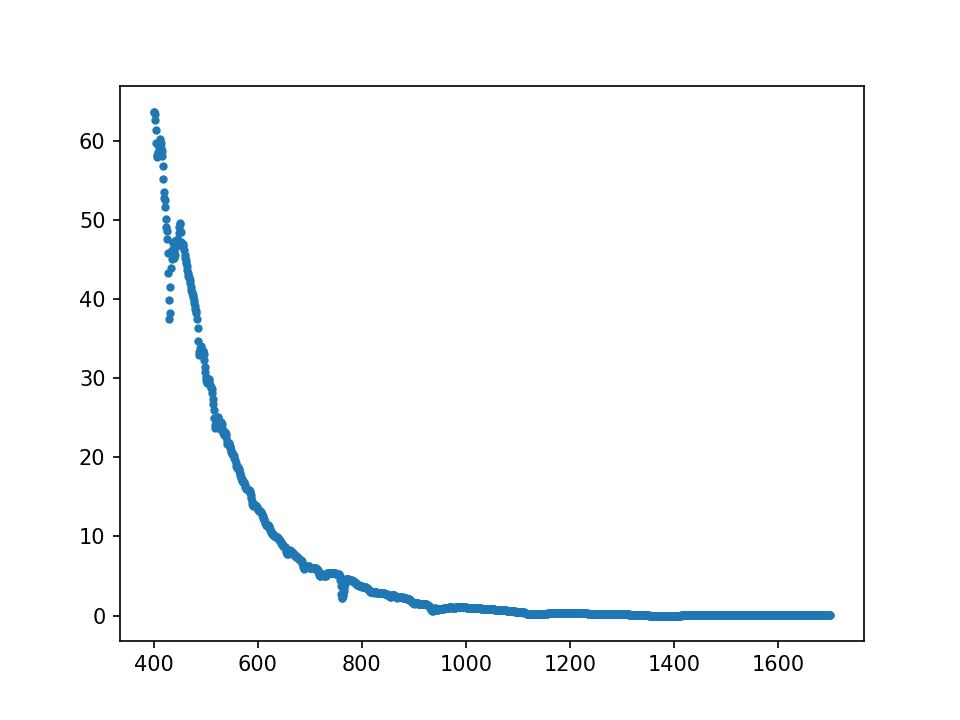

In [25]:
import matplotlib.pyplot as plt
%matplotlib notebook


<IPython.core.display.Javascript object>


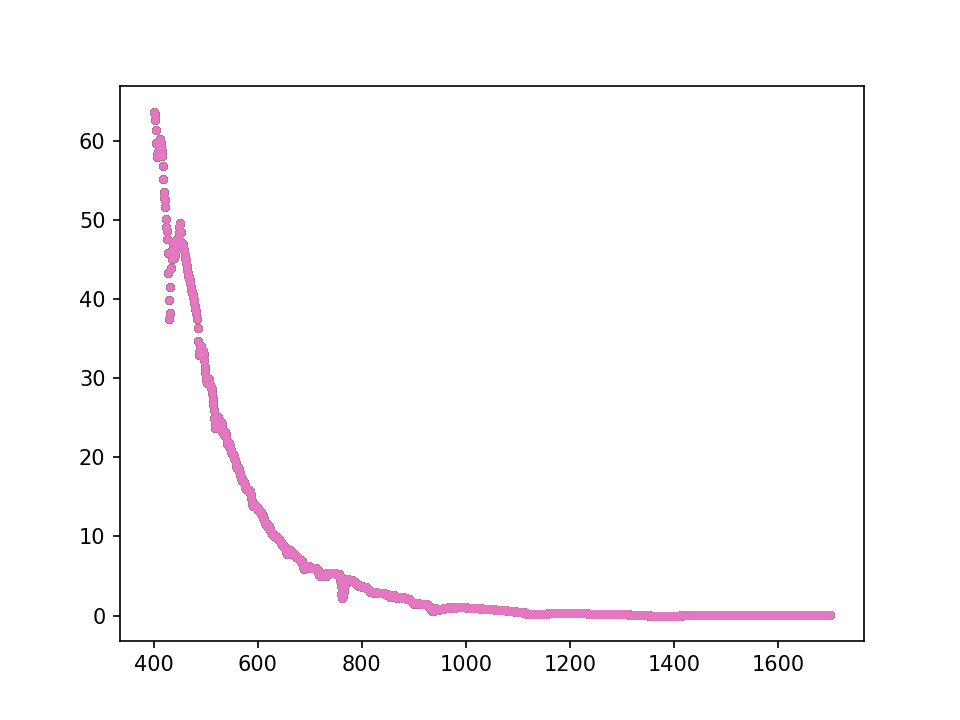

(0, 0.1)
(1, 0.2)
(2, 0.5)
(3, 0.75)
(4, 1.0)
(5, 1.5)
(6, 2.0)
(7, 3.0)
(8, 4.0)
(9, 5.0)
(10, 6.0)
(11, 7.0)
(12, 8.0)
(13, 9.0)
(14, 10.0)
(15, 12.5)
(16, 15.0)
(17, 17.5)
(18, 20.0)
(19, 25.0)
(20, 30.0)
(21, 35.0)
(22, 40.0)
(23, 50.0)
(24, 60.0)
(25, 80.0)
(26, 100.0)


In [30]:
plt.figure()
for it,t in enumerate(dat['tau']):
    print(it,t)
    plt.plot(dat['wvl'],dat['rad'][0,:,0,0,it,0],'.')